## Making fun pictures:
- dress (ID 3) 400 - Need 400 more. - 1 transformation / image<br>
- Pullover (ID 2) - Need 700 more.  7 transformations/image<br>
- top (ID 0) - Need 799 more.  ~37 transformations / image if we take 20 images from validation set. 1 image with 39 transformations <br>
- trouser (ID 1) - Need 799 more. ~37 transformations / image. 1 image with 39 transformations<br>
<br>
---
Available Transformations:<br>
1. one Flip Image<br>
2. 16 different rotations<br>
3. 4 lighten image<br>
4. 4 darken image<br>
5. 7 types of noise addition.<br>

#### Tops & Trousers: <br>
- 7 noise + 6 rotation + 4 light + 4 dark = 24 transformations<br>
- 7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations<br>

#### Pullovers: 
4 noise/flip + 1 rot/light + 1 rot/dark + 1 dark/noise= 7 transformations<br>

#### Dress:
1 noise/flip for each dress.


In [1]:
from PIL import Image, ImageEnhance
import skimage
from load_data import load_data 
import numpy as np
import matplotlib.pyplot as plt
from transfomations import all_rot, all_noise, all_expo, show_image, noise_exp, noise_flip, rot_expose

In [2]:
x_tr, y_tr_df = load_data('x_train.csv', 'y_train.csv')
x_va, y_va_df = load_data('x_valid.csv', 'y_valid.csv')
x_te = load_data('x_test.csv', 'y_valid.csv')[0]

In [3]:
#Scaling images between 0 and 1. Works better with skimage
x_tr_sc=np.divide(x_tr, 255)
x_va_sc = np.divide(x_va, 255)

In [4]:
#getting index for each class in training set:
top_int = y_tr_df.index[y_tr_df['class_name']=='top']    #index 1
trous_int = y_tr_df.index[y_tr_df['class_name']=='trouser']    #index 11
dress_int =(y_tr_df.index[y_tr_df['class_name']=='dress']).tolist()
pull_int =(y_tr_df.index[y_tr_df['class_name']=='pullover']).tolist()
sneaker_int =(y_tr_df.index[y_tr_df['class_name']=='sneaker']).tolist()
sandal_int =(y_tr_df.index[y_tr_df['class_name']=='sandal']).tolist()

## Transformation Funcs for combination

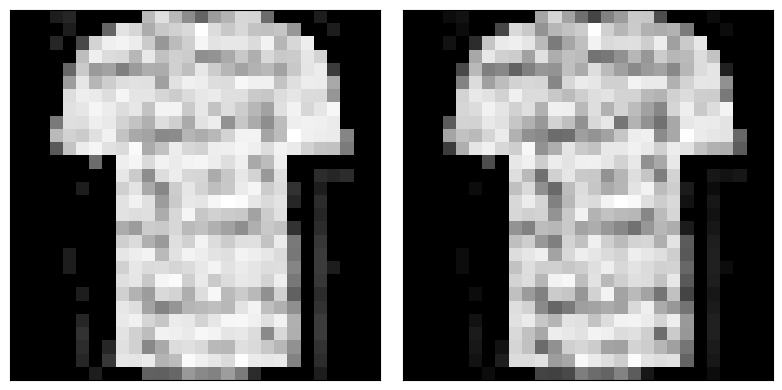

In [5]:
#Testing
top = ((x_tr_sc[top_int]).reshape((28,28)))
test1 = all_expo(top, 2, 'light')
# Plot test data
fig, axgrid = plt.subplots(1, 2, figsize=(8, 4))
shirt1 = test1[0]
shirt2 = test1[1]
ax5 = axgrid[0]
ax6 = axgrid[1]
x_SS = (shirt1).reshape((28,28))
ax5.imshow(x_SS, vmin=0, vmax=1, cmap='gray')
ax5.set_xticks([]); ax5.set_yticks([]);

x_SS2 = shirt2.reshape((28,28))
ax6.imshow(x_SS2, vmin=0, vmax=1, cmap='gray')
ax6.set_xticks([]); ax6.set_yticks([]);

plt.tight_layout();
plt.show();

## Creating New Dataset

#### Dresses

In [6]:
#adding transformed dresses:
dresses = x_tr_sc[dress_int, :]
print(dresses.shape)
all_dresses = dresses
for i in range(0, 400):
    dress_pic= (dresses[i, :]).reshape((28, 28))
    new_dress = noise_flip(dress_pic, 1)
    all_dresses = np.vstack((all_dresses, new_dress))
print(all_dresses.shape)
assert(all_dresses.shape == (800, 784))

(400, 784)
(800, 784)


#### Pullovers

In [7]:
# Now the pull overs
# 4 noise/flip + 1 rot/light + 1 rot/dark + 1 dark/noise= 7 transformations
pulls = x_tr_sc[pull_int, :]
all_pulls = pulls
for i in range(0, 100):
    pull_pic= (pulls[i, :]).reshape((28, 28))

    #get four noisy & flipped image/pullovr
    new_pull1 = noise_flip(pull_pic, 4) 
    all_pulls = np.vstack((all_pulls, new_pull1))

    #Adding 1 rotated and lightened version of each pullover
    new_pull2 = rot_expose(pull_pic, 1, 'light')
    all_pulls = np.vstack((all_pulls, new_pull2))

    #adding 1 rotated and darkedned version of each pullover
    new_pull3 = rot_expose(pull_pic, 1, 'dark')
    all_pulls = np.vstack((all_pulls, new_pull3))
    
    #get 1 noisy & darkened image/pullovr
    new_pull4 = noise_exp(pull_pic, 1, 'dark')
    all_pulls = np.vstack((all_pulls, new_pull4))

assert(all_pulls.shape == (800, 784))

#### Pants

In [16]:
#7 noise + 6 rotation + 4 light + 4 dark = 24 transformations<br>
#7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations
va_trouser_idx = (y_va_df.index[y_va_df['class_name']=='trouser']).tolist()
va_trousers = x_va_sc[va_trouser_idx[:20], :]
assert(va_trousers.shape == (20, 784))
tr_pant=x_tr_sc[trous_int, :]
trousers = np.vstack((tr_pant, va_trousers))
assert(trousers.shape == (21, 784))

all_trous = trousers    #The final array to be returned

#two additional transformation to tr_pant:
tr_pant_pic= (tr_pant).reshape((28, 28))
tr_flipped = (np.fliplr(tr_pant_pic))
tr_flip_light =all_expo(tr_flipped, 1, 'light')
all_trous = np.vstack((all_trous, tr_flipped.reshape((1, 784))))
all_trous = np.vstck((all_trous, tr_flip_light))

for i in range(0, 21):
    pant_pic= (trousers[i, :]).reshape((28, 28))

    # All seven noise
    noisy_pant = all_noise(pant_pic)  
    all_trous = np.vstack((all_trous, noisy_pant))

    light_pant = all_expo(pant_pic, 4, 'light')
    all_trous = np.vstack((all_trous, light_pant))

    dark_pant = all_expo(pant_pic, 4, 'dark')
    all_trous = np.vstack((all_trous, dark_pant))

    rot_pant = all_rot(pant_pic, 6)
    all_trous = np.vstack((all_trous, rot_pant))

    #get four noisy & flipped image/pullovr
    new_pant1 = noise_flip(pant_pic, 7) 
    all_trous = np.vstack((all_trous, new_pant1))

    #Adding 1 rotated and lightened version of each pantover
    new_pant2 = rot_expose(pant_pic, 4, 'light')
    all_trous = np.vstack((all_trous, new_pant2))

    #adding 1 rotated and darkedned version of each pantover
    new_pant3 = rot_expose(pant_pic, 4, 'dark')
    all_trous = np.vstack((all_trous, new_pant3))
    
    #get 1 noisy & darkened image/pantovr
    new_pant4 = noise_exp(pant_pic, 1, 'dark')
    all_trous = np.vstack((all_trous, new_pant4))
    
print(all_trous.shape)
assert(all_trous.shape == (800, 784))

IndexError: index 20 is out of bounds for axis 0 with size 1

#### tops

In [ ]:
#7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations
va_top_idx = (y_va_df.index[y_va_df['class_name']=='top']).tolist()
va_tops = x_va_sc[va_top_idx[:20], :]
assert(va_trousers.shape == (20, 784))

shirts = np.vstack(((x_tr_sc[top_int, :]), va_tops))
assert(shirts.shape == (21, 784))

all_shirts = shirts    #The final array to be returned
for i in range(0, 21):
    top_pic= (shirts[i, :]).reshape((28, 28))

    # All seven noise
    noisy_top = all_noise(top_pic)  
    all_shirts = np.vstack((all_shirts, noisy_top))

    flipped_top = (np.fliplr(top_pic))   #Flip the pic
    all_shirts = np.vstack((all_shirts, flipped_top.reshape((1, 784))))

    light_top = all_expo(top_pic, 4, 'light')
    all_shirts = np.vstack((all_shirts, light_top))

    dark_top = all_expo(top_pic, 4, 'dark')
    all_shirts = np.vstack((all_shirts, dark_top))

    rot_top = all_rot(top_pic, 8)
    all_shirts = np.vstack((all_shirts, rot_top))

    #get four noisy & flipped image/pullovr
    new_top1 = noise_flip(top_pic, 7) 
    all_shirts = np.vstack((all_shirts, new_top1))

    #Adding 1 rotated and lightened version of each pantover
    new_top2 = rot_expose(top_pic, 4, 'light')
    all_shirts = np.vstack((all_shirts, new_top2))

    #adding 1 rotated and darkedned version of each pantover
    new_top3 = rot_expose(top_pic, 4, 'dark')
    all_shirts = np.vstack((all_shirts, new_top3))
    
    #get 1 noisy & darkened image/pantovr
    new_top4 = noise_exp(top_pic, 1, 'dark')
    all_shirts = np.vstack((all_shirts, new_top4))

assert(all_shirts.shape == (800, 784))

AssertionError: 

## Testing each trasnformation to find bounds

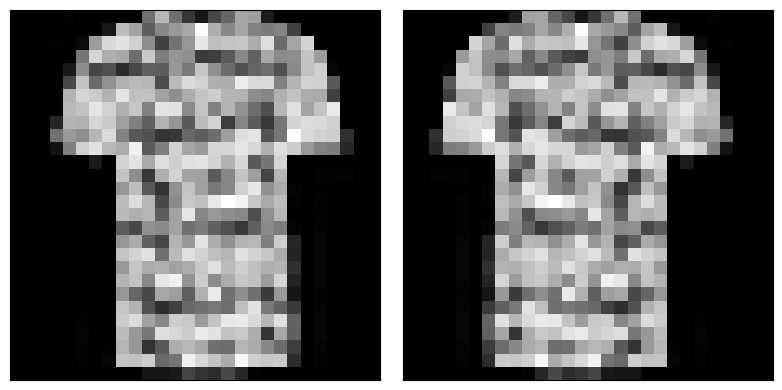

In [ ]:
#Flip shirt, just use numpy...
top = (x_tr_sc[top_int]).reshape((28,28))
flip_top = (np.fliplr(top))
show_image(x_tr_sc, top_int, flip_top)

#Flipped image. Also array of new top images
new_tops = flip_top.reshape((1, 784))   #1

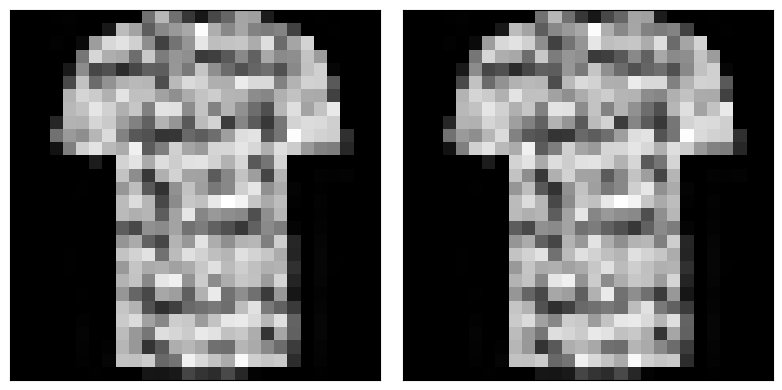

In [ ]:
light_top1 = skimage.exposure.adjust_gamma(top, 0.9)    # light 0.1 -0.9 
light_top2 = skimage.exposure.adjust_gamma(top, 0.1)  
dark_top1 = skimage.exposure.adjust_gamma(top, 2)    #Dark 2 - 3
dark_top2 = skimage.exposure.adjust_gamma(top, )    

show_image(x_tr_sc, top_int, dark_top2)

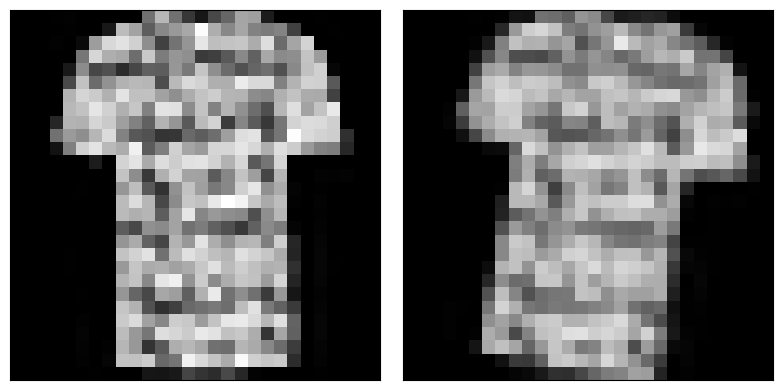

In [ ]:
r_top = skimage.transform.rotate(top, -10)    # +/- 10 ~ 2 degrees 
show_image(x_tr_sc, top_int, r_top)

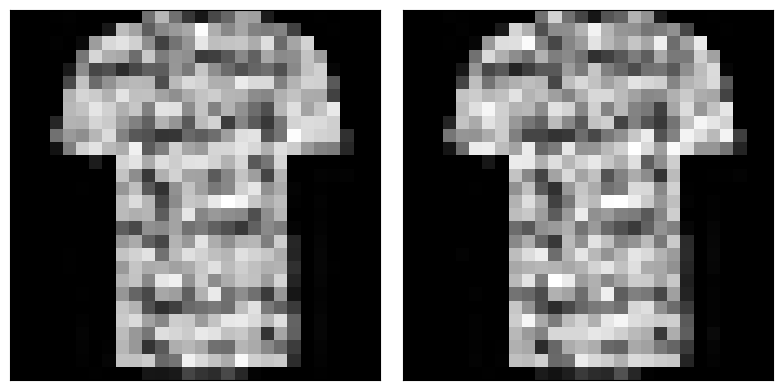

In [ ]:
noisy_top1 = skimage.util.random_noise(top, mode='gaussian')
noisy_top2= skimage.util.random_noise(top, mode='localvar')
noisy_top3= skimage.util.random_noise(top, mode='salt')
noisy_top4= skimage.util.random_noise(top, mode='pepper')
noisy_top5= skimage.util.random_noise(top, mode='s&p')
noisy_top6= skimage.util.random_noise(top, mode='speckle')
noisy_top7= skimage.util.random_noise(top, mode='poisson')

show_image(x_tr_sc, top_int, noisy_top7)